## Challenge Lab

This lab aims to test your ability to generate a model (of your choice) and use that model for inference. In this lab, you will use **Python** to solve the problem. You are given a dataset `files/000.csv` and your goal is to follow the machine learning process to **(1)** split the data into `training set` and `test set`, **(2)** train a model using the `training set`, and finally **(3)** test the model using the `test set`

- **Part I**. Loading and Inspecting the Data
- **Part II**. Performing the Train-Test Split on the Dataset
- **Part III**. Using the Algorithm
- **Part IV**. Evaluating the Model

The target variable is **selected** and the model must be able to identify if a game character is **selected** or **not selected** based on the stats (e.g. strength, speed, stamina, experience) provided

You may use any model to solve this **classification** problem.

### Part I. Loading and Inspecting the Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from sklearn.utils.fixes import loguniform

In [2]:
df = pd.read_csv("files/000.csv")

df

,strength,speed,stamina,experience,selected
0,80,50,90,50,1
1,90,40,80,80,1
2,30,80,50,40,0
3,50,30,80,60,0
4,20,90,90,50,1
5,30,50,40,30,0
6,40,80,40,90,1
7,50,60,50,30,0
8,40,40,40,30,0
9,70,20,70,0,1


### Part II. Performing the Train-Test Split on the Dataset

In [3]:
X = df.drop('selected', axis=1)
Y = df['selected']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 3)

### Part III. Using the Algorithm of your choice

In [29]:
param_grid = {'C': uniform(1,5), 'gamma': loguniform(1e-1,1e0),'kernel': ['poly', 'rbf']}

In [30]:
#classifier = SVC(kernel='poly')  
#classifier = LogisticRegression(class_weight='balanced')
classifier = RandomizedSearchCV(SVC(),param_grid,cv=5,n_iter=50,n_jobs=-1)

classifier.fit(x_train, y_train)  

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f646a3cba58>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f646a214dd8>,
                                        'kernel': ['poly', 'rbf']})

In [31]:
print(f'Best C: {classifier.best_estimator_.C}')
print(f'Best Kernel: {classifier.best_estimator_.kernel}')
print(f'Best Gamma: {classifier.best_estimator_.gamma}')

Best C: 3.371774232530139
Best Kernel: poly
Best Gamma: 0.2818395475242674


### Part IV. Evaluating the Model

In [32]:
y_pred_train = classifier.predict(x_train)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


<AxesSubplot:>

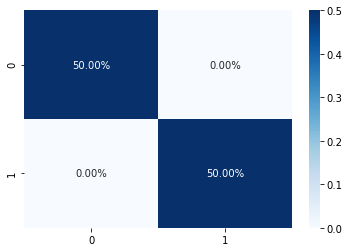

In [33]:
print(f"Accuracy: {metrics.accuracy_score(y_pred_train, y_train)}")
print(f"Precision: {metrics.precision_score(y_pred_train, y_train)}")
print(f"Recall: {metrics.recall_score(y_pred_train, y_train)}")

confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train)
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot = True, fmt = '.2%', cmap='Blues')

In [34]:
y_pred_test = classifier.predict(x_test)  

Accuracy: 0.8333333333333334
Precision: 1.0
Recall: 0.75


<AxesSubplot:>

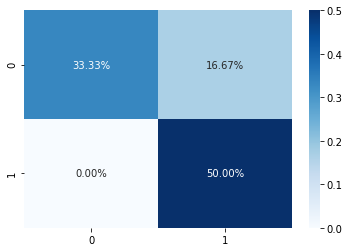

In [35]:
print(f"Accuracy: {metrics.accuracy_score(y_pred_test, y_test)}")
print(f"Precision: {metrics.precision_score(y_pred_test, y_test)}")
print(f"Recall: {metrics.recall_score(y_pred_test, y_test)}")

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot = True, fmt = '.2%', cmap='Blues')